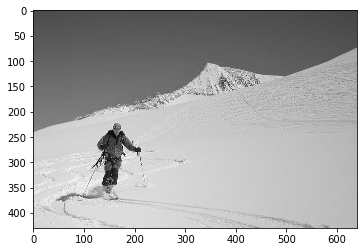

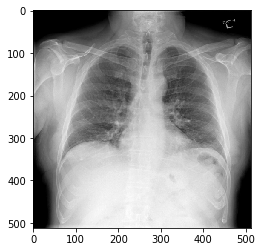

In [1]:
import matplotlib.pyplot as plt
from skimage import io,img_as_float

a=io.imread('000000038118.jpg')
b=io.imread('CXR7_IM-2263-1001.png')

plt.imshow(a,cmap='gray',interpolation='nearest')
plt.show()
plt.imshow(b, cmap='gray', interpolation='nearest') 
plt.show()

In [2]:
from models.lip import LIPImage,LIPSpace
from models.hlip import HLIPImage,HLIPSpace
from models.pslip import PSLIPImage,PSLIPSpace
from models.plip import PLIPSpace
from models.ppslip import PPSLIPSpace

In [3]:
import numpy as np
from skimage.filters import scharr

## Lineal

Lossy conversion from float64 to uint8. Range [0.009959022487485907, 1.4775524170447656]. Convert image to uint8 prior to saving to suppress this warning.


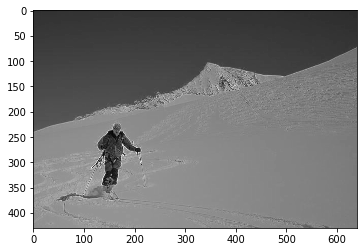

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


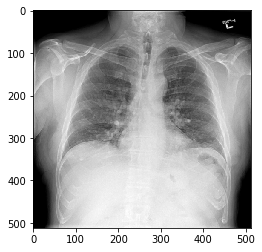

In [4]:
la=a/256

sla=scharr(la)

la_sla=la+sla

io.imsave('la_sla.png',la_sla)

plt.imshow(la_sla,cmap='gray',interpolation='nearest')
plt.show()

lb=b/256

slb=scharr(lb)

lb_slb=lb+slb

io.imsave('lb_slb.png',lb_slb)

plt.imshow(lb_slb,cmap='gray',interpolation='nearest')
plt.show()

## LIP

Lossy conversion from float64 to uint8. Range [2.9689269354093994e-06, 248.8408565110345]. Convert image to uint8 prior to saving to suppress this warning.


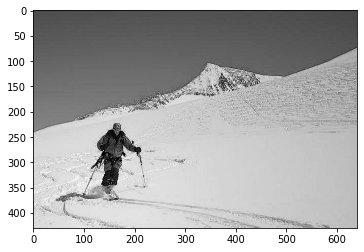

Lossy conversion from float64 to uint8. Range [2.864908310584724e-11, 244.11887348196495]. Convert image to uint8 prior to saving to suppress this warning.


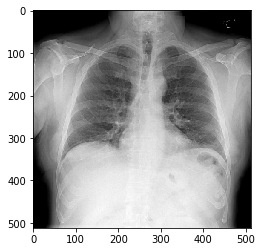

In [5]:
js=LIPSpace()

ja=js.function(js.gray_tone(a))

ja_sja=js.inverse_gray_tone(js.inverse_function(ja+scharr(ja)))

io.imsave('ja_sja.png',ja_sja)

plt.imshow(ja_sja,cmap='gray',interpolation='nearest')
plt.show()

jb=js.function(js.gray_tone(b))

jb_sjb=js.inverse_gray_tone(js.inverse_function(jb+scharr(jb)))

io.imsave('jb_sjb.png',jb_sjb)

plt.imshow(jb_sjb,cmap='gray',interpolation='nearest')
plt.show()

## HLIP

Lossy conversion from float64 to uint8. Range [2.047087079404264e-06, 254.65270309634155]. Convert image to uint8 prior to saving to suppress this warning.


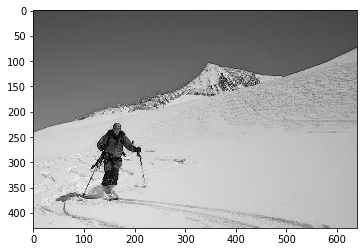

Lossy conversion from float64 to uint8. Range [2.1046275833214168e-11, 244.33124767724763]. Convert image to uint8 prior to saving to suppress this warning.


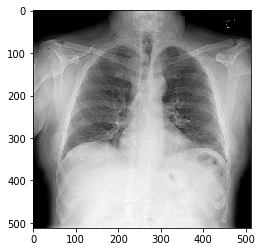

In [13]:
hs=HLIPSpace()

ha=hs.function(hs.gray_tone(a))

ha_sha=hs.inverse_gray_tone(hs.inverse_function(ha-scharr(ha)))

io.imsave('ha_sha.png',ha_sha)

plt.imshow(ha_sha,cmap='gray',interpolation='nearest')
plt.show()

hb=hs.function(hs.gray_tone(b))

hb_shb=hs.inverse_gray_tone(hs.inverse_function(hb-scharr(hb)))

io.imsave('hb_shb.png',hb_shb)

plt.imshow(hb_shb,cmap='gray',interpolation='nearest')
plt.show()

## PSLIP

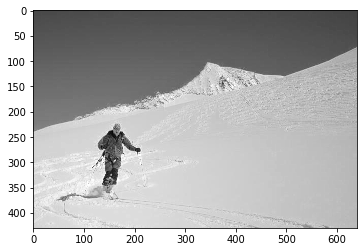

Lossy conversion from float64 to uint8. Range [3.321437194361263, 255.0691835556732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 246.37949080050112]. Convert image to uint8 prior to saving to suppress this warning.


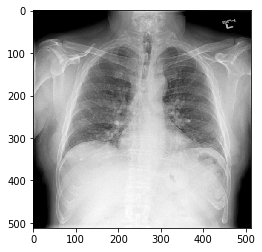

In [14]:

pss=PSLIPSpace()

psa=pss.function(pss.gray_tone(a))

psa_spsa=pss.inverse_gray_tone(pss.inverse_function(psa+scharr(psa)))

plt.imshow(psa_spsa,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('psa_spsa.jpg',psa_spsa)

psb=pss.function(pss.gray_tone(b))

psb_spsb=pss.inverse_gray_tone(pss.inverse_function(psb+scharr(psb)))

io.imsave('psb_spsb.jpg',psb_spsb)

plt.imshow(psb_spsb,cmap='gray',interpolation='nearest')
plt.show()

## PLIP

300 300


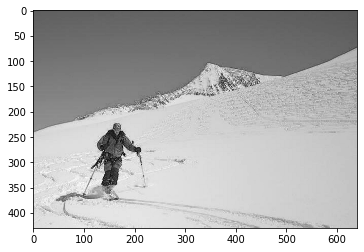

Lossy conversion from float64 to uint8. Range [16.327310568180565, 292.88911486127927]. Convert image to uint8 prior to saving to suppress this warning.


In [17]:
from emee import emee

mis=[256,400,500,800,1000,1026,4100,600,300,250,200]
gammas=[256,400,1000,2000,300,500,600,512,1026,4100,1280,800,526]

ps=PLIPSpace()

d_1 = 4 if a.shape[0]%4==0 else 5
d_2 = 4 if a.shape[1]%4==0 else 5
max_emee=-1
max_gamma=-1
max_mi=-1
for ga in gammas:
    pa=ps.function(ps.gray_tone(a),ga)
    pa_spa=ps.inverse_function(pa+scharr(pa),ga)
    for mi in mis:
        max_pi_r=np.max(pa_spa)
        if mi < max_pi_r + 1:
            continue
        result=ps.inverse_gray_tone(pa_spa,mi)
        actual_emee=emee(result,1,d_1,d_2,0.5)
        if actual_emee > max_emee:
            max_emee=actual_emee
            max_gamma=ga
            max_mi=mi
pa=ps.function(ps.gray_tone(a),max_gamma)
result=ps.inverse_gray_tone(ps.inverse_function(pa+scharr(pa),max_gamma),max_mi)
print(max_gamma,max_mi)

plt.imshow(result,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('pb_spa.jpg',result)

4100 200
[[218.18147247 202.65956659 200.12688492 ... 262.32050494 265.36089251
  251.66089038]
 [204.29525976 192.80705199 194.61727515 ... 170.72495552 173.13506426
  174.09316053]
 [206.3759709  195.8910816  197.13757975 ... 182.84545261 179.47799319
  184.49095121]
 ...
 [199.00001    199.00001    199.00001    ... 199.00001    199.00001
  199.00001   ]
 [199.00001    199.00001    199.00001    ... 199.00001    199.00001
  199.00001   ]
 [199.00001    199.00001    199.00001    ... 199.00001    199.00001
  199.00001   ]]


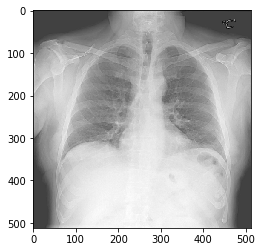

Lossy conversion from float64 to uint8. Range [113.68417470528142, 443.13100835634077]. Convert image to uint8 prior to saving to suppress this warning.


In [18]:
mis=[256,400,500,800,1000,1026,4100,600,300,250,200]
gammas=[256,400,1000,2000,300,500,600,512,1026,4100,1280,800,526]

ps=PLIPSpace()

d_1 = 4 if b.shape[0]%4==0 else 5
d_2 = 4 if b.shape[1]%4==0 else 5
max_emee=-1
max_gamma=-1
max_mi=-1

for ga in gammas:
    pa=ps.function(ps.gray_tone(b,1),ga)
    pa_spa=ps.inverse_function(pa+scharr(pa),ga)
    for mi in mis:
        max_pi_r=np.max(pa_spa)
        if mi < max_pi_r+1:
            continue
        result=ps.inverse_gray_tone(pa_spa,mi)
        actual_emee=emee(result,1,d_1,d_2,0.5)
        if actual_emee > max_emee:
            max_emee=actual_emee
            max_gamma=ga
            max_mi=mi
pa=ps.function(ps.gray_tone(b,1),max_gamma)
result=ps.inverse_gray_tone(ps.inverse_function(pa+scharr(pa),max_gamma),max_mi)
print(max_gamma,max_mi)

print(result)
plt.imshow(result,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('pb_spb.jpg',result)

## PPSLIP

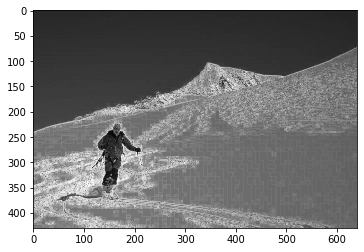

Lossy conversion from float64 to uint8. Range [3.321437194361263, 475.6200174672202]. Convert image to uint8 prior to saving to suppress this warning.


256 4000
0.5670456335287021


In [19]:
Ms=[256,300,400,500,600,800,1000,2000,3000,4000]

ppss=PPSLIPSpace()

d_1 = 4 if a.shape[0]%4==0 else 5
d_2 = 4 if a.shape[1]%4==0 else 5
max_emee=-1
max_M_1=-1
max_M_2=-1

for M_1 in Ms:
    ppsa=ppss.function(ppss.gray_tone(a,M_1))
    sppsa=ppss.inverse_gray_tone(ppss.inverse_function(scharr(ppsa)),M_1)  
    
    for M_2 in Ms:
        ppsa_sppsa=ppss.inverse_gray_tone(ppss.sum(ppss.gray_tone(a,M_2),ppss.gray_tone(sppsa,M_2)),M_2)

    actual_emee=emee(ppsa_sppsa,1,d_1,d_2,0.5)
    if actual_emee > max_emee:
        max_emee=actual_emee
        max_M_1=M_1
        max_M_2=M_2

ppsa=ppss.function(ppss.gray_tone(a,max_M_1))
sppsa=ppss.inverse_gray_tone(ppss.inverse_function(scharr(ppsa)),max_M_1)
ppsa_sppsa=ppss.inverse_gray_tone(ppss.sum(ppss.gray_tone(a,max_M_2),ppss.gray_tone(sppsa,max_M_2)),max_M_2)

plt.imshow(ppsa_sppsa,cmap='gray',interpolation='nearest')
plt.show()

print(max_M_1,max_M_2)

io.imsave('ppsa_sppsa.jpg',ppsa_sppsa)

print(emee(ppsa_sppsa,1,5,5,0.5))
    

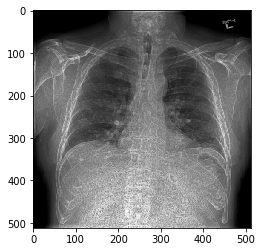

Lossy conversion from float64 to uint8. Range [0.0, 436.38843323133636]. Convert image to uint8 prior to saving to suppress this warning.


256 4000
1.9748797772479822


In [20]:
Ms=[256,300,400,500,600,800,1000,2000,3000,4000]

ppss=PPSLIPSpace()

d_1 = 4 if b.shape[0]%4==0 else 5
d_2 = 4 if b.shape[1]%4==0 else 5
max_emee=-1
max_M_1=-1
max_M_2=-1

for M_1 in Ms:
    ppsa=ppss.function(ppss.gray_tone(b,M_1))
    sppsa=ppss.inverse_gray_tone(ppss.inverse_function(scharr(ppsa)),M_1)  
    
    for M_2 in Ms:
        ppsa_sppsa=ppss.inverse_gray_tone(ppss.sum(ppss.gray_tone(b,M_2),ppss.gray_tone(sppsa,M_2)),M_2)

    actual_emee=emee(ppsa_sppsa,1,d_1,d_2,0.5)
    if actual_emee > max_emee:
        max_emee=actual_emee
        max_M_1=M_1
        max_M_2=M_2

ppsa=ppss.function(ppss.gray_tone(b,max_M_1))
sppsa=ppss.inverse_gray_tone(ppss.inverse_function(scharr(ppsa)),max_M_1)
ppsa_sppsa=ppss.inverse_gray_tone(ppss.sum(ppss.gray_tone(b,max_M_2),ppss.gray_tone(sppsa,max_M_2)),max_M_2)

plt.imshow(ppsa_sppsa,cmap='gray',interpolation='nearest')
plt.show()

print(max_M_1,max_M_2)

io.imsave('ppsb_sppsb.jpg',ppsa_sppsa)

print(emee(ppsa_sppsa,1,4,4,0.5))
    